In [1]:
import pandas as pd
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, 
    precision_recall_curve,
    auc,
    f1_score,
    recall_score,
    precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
# load train and test data
folder = 'dataset'

train_df = pd.read_csv(folder+'/training.csv')
test_df = pd.read_csv(folder+'/testing.csv')

In [3]:
train_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V24,V27,Amount,Class
count,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000,225168.000000
mean,0.038152,0.040981,0.016070,-0.020380,0.004002,0.003430,-0.002097,0.001811,-0.003740,0.003046,-0.002577,-0.000120,-0.003261,-0.000483,0.002486,0.002573,-0.000670,-0.000778,82.678707,0.001768
std,1.768452,1.381479,1.455511,1.383925,1.199876,1.269894,1.073636,1.094173,1.076580,1.017137,0.996482,0.951634,0.868434,0.840448,0.835432,0.807979,0.604908,0.363668,182.830591,0.042005
min,-30.552380,-16.709995,-31.103685,-5.683171,-22.105532,-6.729542,-43.557242,-13.434066,-24.588262,-3.825953,-18.683715,-19.214325,-14.129855,-25.162799,-9.498746,-4.932733,-2.836627,-8.260909,0.000000,0.000000
25%,-0.912768,-0.591434,-0.874710,-0.851391,-0.689904,-0.766979,-0.549921,-0.639625,-0.535903,-0.759088,-0.407384,-0.423384,-0.467746,-0.483408,-0.497218,-0.451730,-0.355769,-0.070515,5.990000,0.000000
50%,0.020072,0.067294,0.182582,-0.029545,-0.053392,-0.274660,0.042595,-0.049418,-0.096167,-0.029600,0.139540,0.051002,0.064651,-0.067036,-0.001791,0.005304,0.040630,0.001583,22.450000,0.000000
75%,1.314710,0.806490,1.025287,0.724994,0.609940,0.395248,0.570350,0.599372,0.442096,0.742384,0.615226,0.492869,0.520367,0.398870,0.502911,0.458326,0.438819,0.091308,77.500000,0.000000
max,2.334476,22.057729,4.187811,11.927512,11.095089,11.680044,10.247050,10.392889,15.331742,12.018913,4.846452,7.754599,4.816252,9.253526,4.295648,5.228342,4.022866,4.591416,2641.870000,1.000000


In [4]:
# separate independent and dependent variables
train_x = train_df.iloc[:,:-1]
train_y = train_df.iloc[:,-1]
test_x = test_df.iloc[:,:-1]
test_y = test_df.iloc[:,-1]

In [5]:
# data scaling 
std = StandardScaler().fit(train_x)
train_x_scale = pd.DataFrame(std.transform(train_x))
test_x_scale = pd.DataFrame(std.transform(test_x))

In [6]:
NN = MLPClassifier(solver='lbfgs', activation='logistic',alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

In [7]:
NN.fit(train_x_scale, train_y)
# predicted class on test_x
test_y_pred = NN.predict(test_x_scale)
# predicted probability of Class 1 on test_x
test_y_pred_proba = NN.predict_proba(test_x_scale)[:,1]

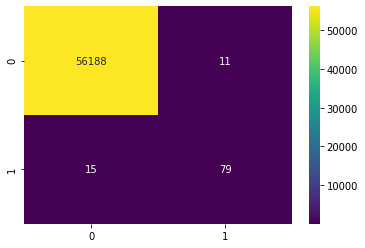

In [8]:
## evaluation on testing set
# confusion matrix
sns.heatmap(confusion_matrix(test_y,test_y_pred),annot=True,fmt='d',cmap='viridis')
plt.show()

In [9]:
# precision score
precision = precision_score(test_y,test_y_pred)
# recall score
recall = recall_score(test_y,test_y_pred)
# calculate f1 score and auc
f1= f1_score(test_y,test_y_pred)
print('Random Forest:\nPrecision Score=%.3f\nRecall Score=%.3f\nF1-score=%.3f' % (precision,recall,f1))

Random Forest:
Precision Score=0.878
Recall Score=0.840
F1-score=0.859


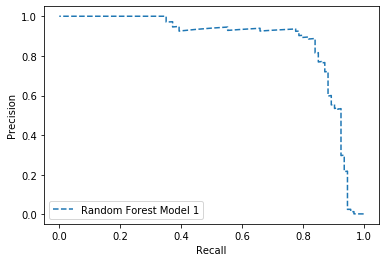

In [36]:
# Precision-Recall Curve
RF1_precision,RF1_recall,thresholds = precision_recall_curve(test_y,test_y_pred_proba)
# plot
plt.plot(RF1_recall,RF1_precision,linestyle='--',label='Random Forest Model 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [11]:
pr_auc = auc(RF1_recall,RF1_precision)
print('AUC=%.3f' % (pr_auc))

AUC=0.869


In [12]:
# train on oversampled data
over = SMOTE(sampling_strategy=0.2,random_state=0)
steps = [('o',over)]
pipeline = Pipeline(steps=steps)

In [13]:
train_x_resample,train_y_resample = pipeline.fit_resample(train_x_scale,train_y)

In [14]:
counter = Counter(train_y_resample)
counter

Counter({0: 224770, 1: 44954})

In [15]:
NN_2 = MLPClassifier(solver='adam', activation='logistic',alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

In [16]:
NN_2.fit(train_x_resample, train_y_resample)
# predicted class on test_x
test_y_resample_pred = NN_2.predict(test_x_scale)
# predicted probability of Class 1 on test_x
test_y_resample_pred_proba = NN.predict_proba(test_x_scale)[:,1]

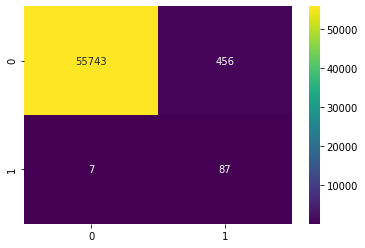

In [35]:
## evaluation on testing set
# confusion matrix
sns.heatmap(confusion_matrix(test_y,test_y_resample_pred),annot=True,fmt='d',cmap='viridis')
plt.show()

In [18]:
# precision score
precision = precision_score(test_y,test_y_resample_pred)
# recall score
recall = recall_score(test_y,test_y_resample_pred)
# calculate f1 score and auc
f1= f1_score(test_y,test_y_resample_pred)
print('Random Forest:\nPrecision Score=%.3f\nRecall Score=%.3f\nF1-score=%.3f' % (precision,recall,f1))

Random Forest:
Precision Score=0.160
Recall Score=0.926
F1-score=0.273


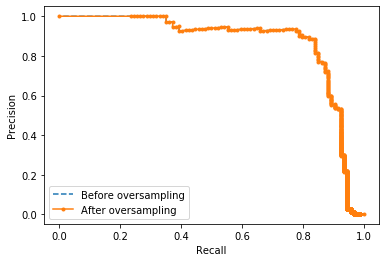

In [37]:
#Recall Curve
RF1_precision_resample,RF1_recall_resample,thresholds = precision_recall_curve(test_y,test_y_resample_pred_proba)

# plot
plt.plot(RF1_recall,RF1_precision,linestyle='--',label='Before oversampling')
plt.plot(RF1_recall_resample,RF1_precision_resample,marker='.',label='After oversampling')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [20]:
pr_auc = auc(RF1_recall_resample,RF1_precision_resample)
print('AUC=%.3f' % (pr_auc))

AUC=0.869


In [33]:
from numpy import argmax
fscore = (2 * RF1_precision_resample * RF1_recall_resample) / (RF1_precision_resample + RF1_recall_resample)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%.3f, F1-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], fscore[ix],RF1_precision_resample[ix],RF1_recall_resample[ix]))

Best Threshold=0.780, F1-Score=0.863, Precision=0.888, Recall=0.840


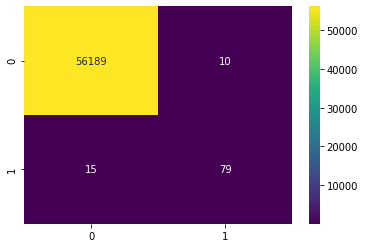

In [34]:
# new confusion matrix for threshold[ix]
test_y_resample_pred_new = [1 if proba >= thresholds[ix] else 0 for proba in test_y_resample_pred_proba]
sns.heatmap(confusion_matrix(test_y,test_y_resample_pred_new),annot=True,fmt='d',cmap='viridis')
plt.show()